In [1]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
#python 3.6.4

"""Student Gradebook Application – Keep track of students (with a student class that has their name, average, and scores) in a class and their grades. Assign their scores on tests and assignments to the students and figure out their average and grade for the class. For added complexity put the students on a bell curve."""

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

random.seed(9)
studentCount = 1000

class School():
	def __init__(self):
		self.students = pd.DataFrame(data=[],columns=['Grade','Grade Average'])
		self.size = self.students.shape[0] #row count
		return

	def addStudent(self,student):
		self.students = self.students.append(pd.Series([student.grade,student.average],index=self.students.columns.tolist(),name=student.name))
		self.size = self.students.shape[0] #row count
		return

	def calcAverage(self):
		if self.size > 0:
			self.stats = self.students.groupby(['Grade']).agg({'Grade Average':[statistics.mean,statistics.median,min,max]})
			self.stats.columns = self.stats.columns.droplevel(0)
			self.stats = pd.merge(self.stats,self.students.reset_index()[['Grade Average','index']],left_on='min',right_on='Grade Average',how='left')
			self.stats = pd.merge(self.stats,self.students.reset_index()[['Grade Average','index']],left_on='max',right_on='Grade Average',how='left')
			self.stats = self.stats[['mean','median','min','max','index_x','index_y']]
			self.stats.rename(columns={'index_x':'classclown','index_y':'valedictorian'},inplace=True)
			self.stats = self.stats.transpose().rename(columns={0:'Value'})
		else:
			self.stats = pd.DataFrame(data=[],columns='Value')
		return

class Student():
	def __init__(self,name,age,grade):
		self.name = name
		self.age = age
		self.grade = grade
		self.scores = []
		self.average = 0
		self.updateAverage()
		return

	def addGrade(self,grade,weight):
		self.scores.append((grade,weight))
		self.updateAverage()
		return

	def updateAverage(self):
		if len(self.scores) > 0:
			self.average = round(sum([x*y for (x,y) in self.scores])/sum([y for (x,y) in self.scores]),2)
		else:
			self.average = -1
		return

students = {}
studentNames = ['Sally','Joe','Bill','Pete','Aaron','Diana','Camilla']
lastNames = ['Bo','West','Cook','Bauer','Rogan','Stu','Oak']
gradeWeights = [random.randrange(1,5) for x in range(0,10)]

grade1 = School()

for i in range(0,studentCount):
	students[i] = Student(random.choice(studentNames)+" "+random.choice(lastNames),13,1)
	for j in range(0,10):
		students[i].addGrade(random.randrange(0,101),gradeWeights[j])
	grade1.addStudent(students[i])

grade1.students.sort_values(by='Grade Average',inplace=True,ascending=False)
grade1.calcAverage()
#grade1.calcMedian()
#print(grade1.students)
print("\nClass stats:\n",grade1.stats)
#print("\nClass median: %s"%grade1.median)
#print("\nValedictorian: %s"%grade1.valedictorian)
#print("\nClass clown: %s"%grade1.classclown)


Class stats:
                     Value
mean               49.563
median              49.15
min                 18.38
max                 81.77
classclown     Bill Rogan
valedictorian  Pete Bauer


In [2]:
statistics.median(grade1.students['Grade Average'].tolist())

49.15

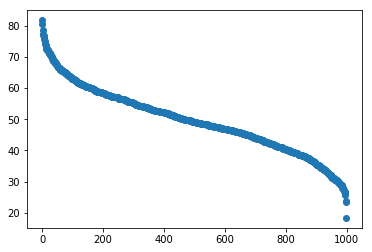

In [3]:
gradesValues = grade1.students['Grade Average'].values
ids = np.array(list(range(0,grade1.size)))

plt.scatter(ids,gradesValues)

In [4]:
grade1.students['Grade Truncated'] = grade1.students['Grade Average'].round(0)

In [5]:
distribByGrade = grade1.students.groupby(['Grade Truncated']).agg({'Grade':'count'})

In [6]:
distribByGrade.reset_index(drop=False,inplace=True)
#distribByGrade

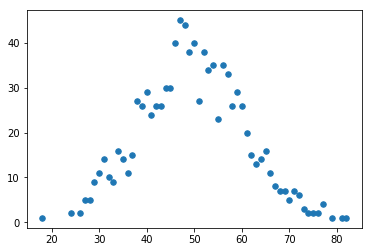

In [7]:
distribValues = distribByGrade.values

plt.scatter(distribValues[:,0],distribValues[:,1],s=30)

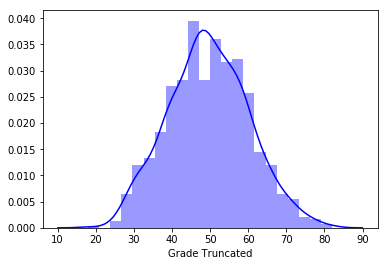

In [8]:
import seaborn as sns

sns.distplot(grade1.students['Grade Truncated'],color='b')
